In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

: 

In [2]:
start = '2007-01-01'
end = '2022-09-28'

df = data.DataReader('AAPL', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2007-01-03,3.092143,2.925000,3.081786,2.992857,1.238320e+09,2.555396
2007-01-04,3.069643,2.993571,3.001786,3.059286,8.472604e+08,2.612116
2007-01-05,3.078571,3.014286,3.063214,3.037500,8.347416e+08,2.593514
2007-01-08,3.090357,3.045714,3.070000,3.052500,7.971068e+08,2.606322
2007-01-09,3.320714,3.041071,3.087500,3.306071,3.349298e+09,2.822829


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-09-22,154.470001,150.910004,152.380005,152.740005,86652500.0,152.740005
2022-09-23,151.470001,148.559998,151.190002,150.429993,95939200.0,150.429993
2022-09-26,153.770004,149.639999,149.660004,150.770004,93339400.0,150.770004
2022-09-27,154.720001,149.949997,152.740005,151.759995,84442700.0,151.759995
2022-09-28,150.639999,144.839996,147.639999,149.839996,146514500.0,149.839996


In [4]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2007-01-03,3.092143,2.925000,3.081786,2.992857,1.238320e+09,2.555396
1,2007-01-04,3.069643,2.993571,3.001786,3.059286,8.472604e+08,2.612116
2,2007-01-05,3.078571,3.014286,3.063214,3.037500,8.347416e+08,2.593514
3,2007-01-08,3.090357,3.045714,3.070000,3.052500,7.971068e+08,2.606322
4,2007-01-09,3.320714,3.041071,3.087500,3.306071,3.349298e+09,2.822829


In [5]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,3.092143,2.925000,3.081786,2.992857,1.238320e+09
1,3.069643,2.993571,3.001786,3.059286,8.472604e+08
2,3.078571,3.014286,3.063214,3.037500,8.347416e+08
3,3.090357,3.045714,3.070000,3.052500,7.971068e+08
4,3.320714,3.041071,3.087500,3.306071,3.349298e+09


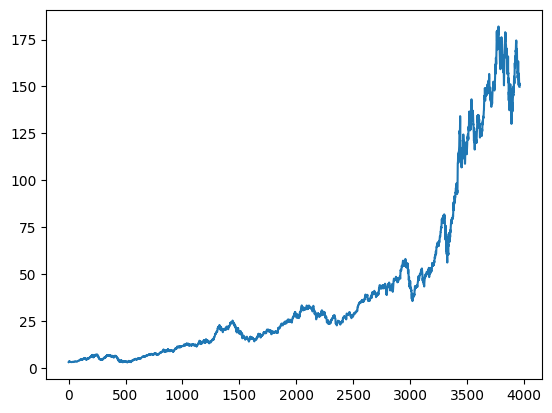

In [6]:
plt.plot(df.Close)

In [7]:
df

,High,Low,Open,Close,Volume
0,3.092143,2.925000,3.081786,2.992857,1.238320e+09
1,3.069643,2.993571,3.001786,3.059286,8.472604e+08
2,3.078571,3.014286,3.063214,3.037500,8.347416e+08
3,3.090357,3.045714,3.070000,3.052500,7.971068e+08
4,3.320714,3.041071,3.087500,3.306071,3.349298e+09
...,...,...,...,...,...
3958,154.470001,150.910004,152.380005,152.740005,8.665250e+07
3959,151.470001,148.559998,151.190002,150.429993,9.593920e+07
3960,153.770004,149.639999,149.660004,150.770004,9.333940e+07
3961,154.720001,149.949997,152.740005,151.759995,8.444270e+07


In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3958    152.1416
3959    152.0663
3960    151.9792
3961    151.8366
3962    151.7673
Name: Close, Length: 3963, dtype: float64

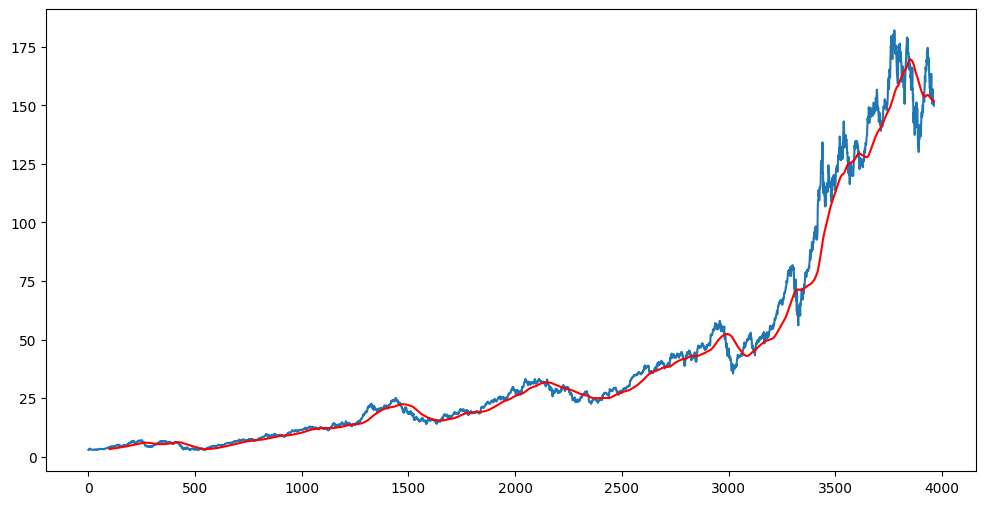

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3958    160.69595
3959    160.59220
3960    160.47065
3961    160.35665
3962    160.20860
Name: Close, Length: 3963, dtype: float64

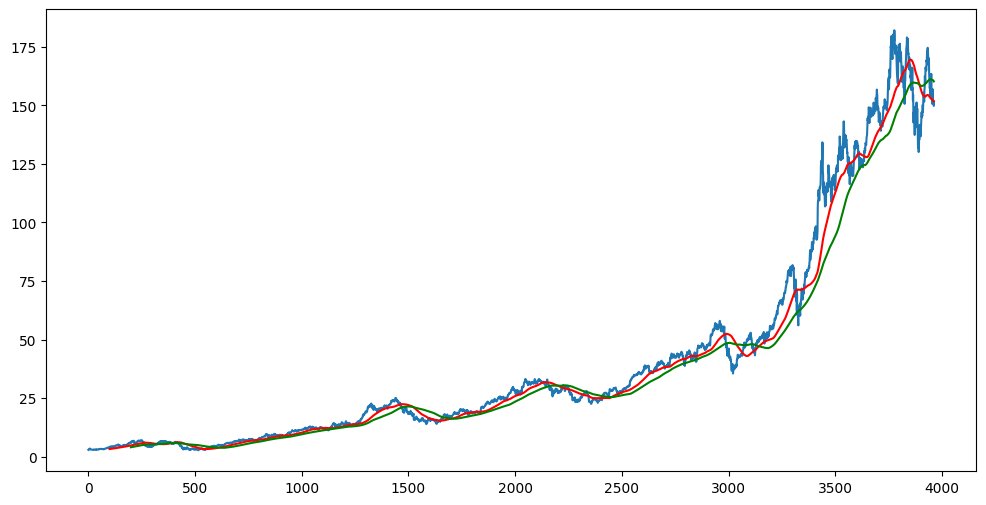

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [12]:
df.shape

(3963, 5)

In [13]:
# Splitting data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2774, 1)
(1189, 1)


In [14]:
data_training.head()

,Close
0,2.992857
1,3.059286
2,3.037500
3,3.052500
4,3.306071


In [15]:
data_testing.head()

,Close
2774,43.582500
2775,43.572498
2776,43.820000
2777,44.272499
2778,44.047501


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.00484119],
       [0.00644917],
       [0.00592182],
       ...,
       [0.97948545],
       [0.9914069 ],
       [0.98747346]])

In [19]:
data_training_array.shape

(2774, 1)

In [18]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [20]:
 # ML Model

In [21]:
from keras.layers import Dense, Dropout , LSTM
from keras.models import Sequential

In [23]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))


In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [25]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
84/84 [==============================] - 36s 339ms/step - loss: 0.0245
Epoch 2/50
84/84 [==============================] - 28s 336ms/step - loss: 0.0058
Epoch 3/50
84/84 [==============================] - 29s 343ms/step - loss: 0.0055
Epoch 4/50
84/84 [==============================] - 29s 341ms/step - loss: 0.0051
Epoch 5/50
84/84 [==============================] - 29s 342ms/step - loss: 0.0050
Epoch 6/50
84/84 [==============================] - 28s 337ms/step - loss: 0.0044
Epoch 7/50
84/84 [==============================] - 28s 339ms/step - loss: 0.0041
Epoch 8/50
84/84 [==============================] - 28s 335ms/step - loss: 0.0038
Epoch 9/50
84/84 [==============================] - 28s 338ms/step - loss: 0.0035
Epoch 10/50
84/84 [==============================] - 28s 338ms/step - loss: 0.0036
Epoch 11/50
84/84 [==============================] - 28s 338ms/step - loss: 0.0033
Epoch 12/50
84/84 [==============================] - 28s 337ms/step - loss: 0.0035
Epoch 13/50
8

In [26]:
model.save('keras_model.h5')

In [27]:
data_testing.head()

,Close
2774,43.582500
2775,43.572498
2776,43.820000
2777,44.272499
2778,44.047501


In [28]:
data_training.tail(100)

,Close
2674,40.237499
2675,39.465000
2676,39.375000
2677,39.302502
2678,39.945000
...,...
2769,43.064999
2770,43.057499
2771,43.257500
2772,43.750000


In [29]:
past_100_days = data_training.tail(100)

In [30]:
final_df = past_100_days.append(data_testing, ignore_index=True)

C:\Users\shubh\AppData\Local\Temp\ipykernel_12752\531349220.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [31]:
final_df.head()

,Close
0,40.237499
1,39.465000
2,39.375000
3,39.302502
4,39.945000


In [32]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.03202184],
       [0.02674746],
       [0.02613297],
       ...,
       [0.78670314],
       [0.79346248],
       [0.78035334]])

In [33]:
input_data.shape

(1289, 1)

In [34]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [35]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1189, 100, 1)
(1189,)


In [36]:
# Making predictions

y_predicted = model.predict(x_test)

38/38 [==============================] - 2s 44ms/step


In [37]:
y_predicted.shape

(1189, 1)

In [38]:
y_test

array([0.05486046, 0.05479217, 0.05648203, ..., 0.78670314, 0.79346248,
       0.78035334])

In [39]:
y_predicted

array([[0.12748605],
       [0.12761611],
       [0.12774917],
       ...,
       [0.7670084 ],
       [0.76437306],
       [0.7614522 ]], dtype=float32)

In [40]:
scaler.scale_

array([0.00682769])

In [42]:
scale_factor = 1/0.00682769
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

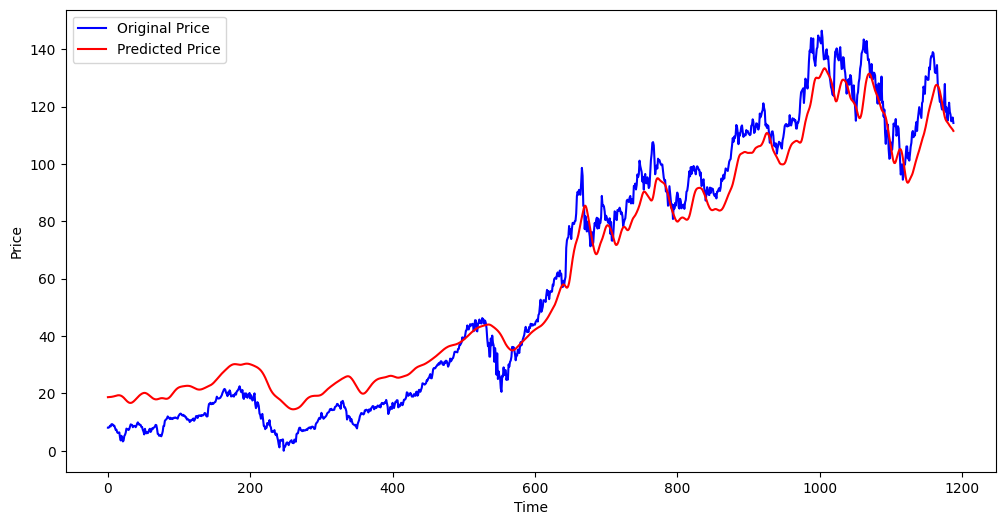

In [43]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()